using conda env `ai`

In [3]:
import os
import json

os.add_dll_directory('C://openslide-win64/bin')

import openslide
from PIL import Image

def save_image(ndpi_file, magnification_level, output_file):
	ndpi_file = openslide.OpenSlide(ndpi_file)

	# Get the dimensions of the NDPI image
	ndpi_width, ndpi_height = ndpi_file.dimensions

	# Get the metadata from the NDPI file
	metadata = dict(ndpi_file.properties)

	# Get width and height from metadata
	ndpi_width = int(metadata['openslide.level[4].width'])
	ndpi_height = int(metadata['openslide.level[4].height'])

	# Load the image at the specified magnification level
	ndpi_image = ndpi_file.read_region((0, 0), magnification_level, (ndpi_width, ndpi_height))

	# Convert the image to RGB format
	ndpi_image = ndpi_image.convert('RGB')

	# Save the image
	ndpi_image.save(output_file)

    # Save the metadata as a JSON file
	metadata = dict(ndpi_file.properties)
	with open(os.path.join(os.path.join(processed_path, 'metadata'), file[:-5] + '.json'), 'w') as metadata_file:
		json.dump(metadata, metadata_file)

data_path = './data/Anaplastic astrocytoma, IDH-mutant'
processed_path = './processed/Anaplastic astrocytoma, IDH-mutant'
# check if the processed path exists
if not os.path.exists(processed_path):
	os.makedirs(processed_path)
	os.makedirs(os.path.join(processed_path, 'metadata'))

for file in os.listdir(data_path):
	if file.endswith('.ndpi'):
		print('Saving', file)
		try:
			save_image(os.path.join(data_path, file), 4, os.path.join(processed_path, file[:-5] + '.png'))
		except:
			print('Error saving', file)

Saving a194f784-357f-11eb-9bda-001a7dda7111.ndpi
Saving a1951e9d-357f-11eb-a743-001a7dda7111.ndpi
Saving a1951ed4-357f-11eb-b88a-001a7dda7111.ndpi
Saving a1956cd0-357f-11eb-9894-001a7dda7111.ndpi
Saving a1959419-357f-11eb-b848-001a7dda7111.ndpi
Saving a195bac4-357f-11eb-94d4-001a7dda7111.ndpi
Saving a195bb4e-357f-11eb-99dd-001a7dda7111.ndpi
Saving a195e1d4-357f-11eb-ae49-001a7dda7111.ndpi
Saving a195e218-357f-11eb-907e-001a7dda7111.ndpi
Saving a19608fd-357f-11eb-8d12-001a7dda7111.ndpi
Saving a1960916-357f-11eb-a1ad-001a7dda7111.ndpi
Saving a1962ff4-357f-11eb-b135-001a7dda7111.ndpi
Saving a1963030-357f-11eb-ad27-001a7dda7111.ndpi
Saving a1963080-357f-11eb-b9e6-001a7dda7111.ndpi
Saving a19656f8-357f-11eb-85f7-001a7dda7111.ndpi
Saving a1965797-357f-11eb-bdba-001a7dda7111.ndpi
Saving a1967e68-357f-11eb-96dc-001a7dda7111.ndpi
Saving a196a588-357f-11eb-b2ff-001a7dda7111.ndpi
Saving a196a5a4-357f-11eb-8c79-001a7dda7111.ndpi
Saving a196a5be-357f-11eb-b81a-001a7dda7111.ndpi
Saving a196cc64-357f

Number of patients: 3115
Number of tumor types: 127
Number of tumor grades: 5
Number of tumor subtypes: 42
Number of control samples: 47
Number of recurrences: 433
Average age: 45.62 (standard deviation: 22.22)
Sex distribution:
male      1593
female    1496
Name: sex, dtype: int64


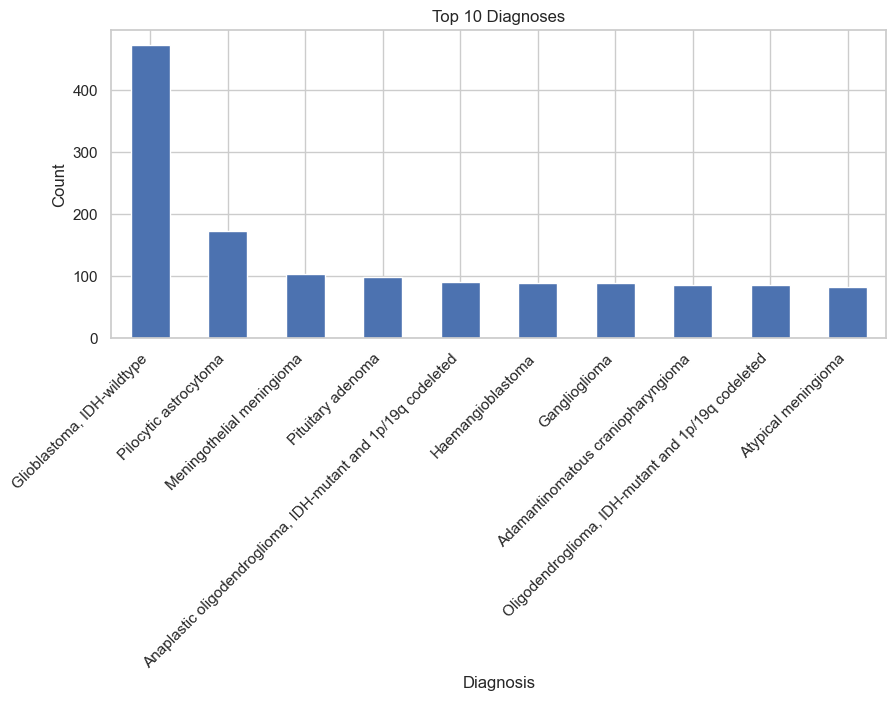

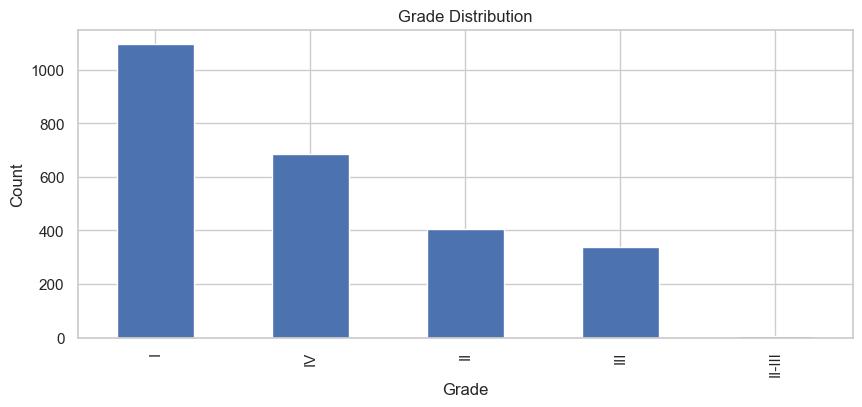

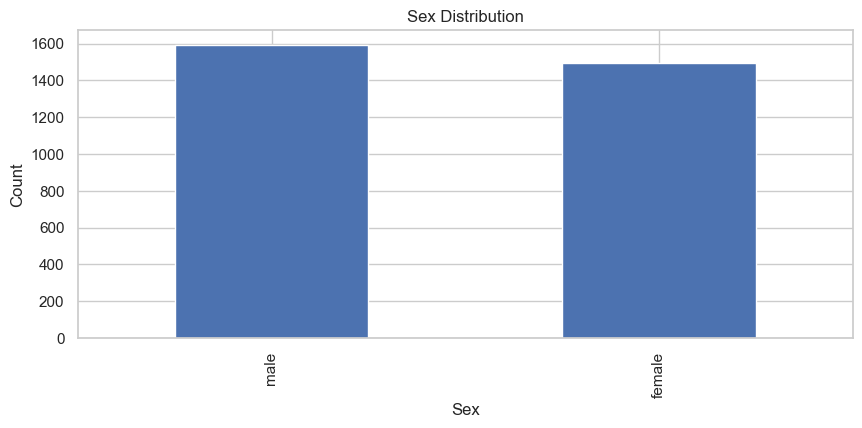

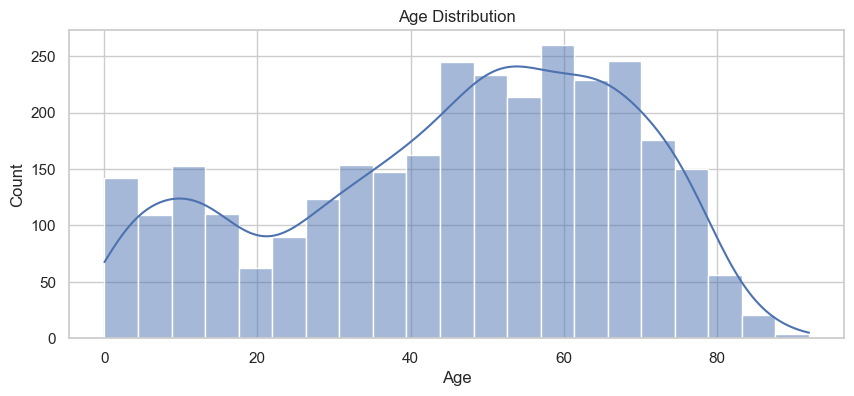

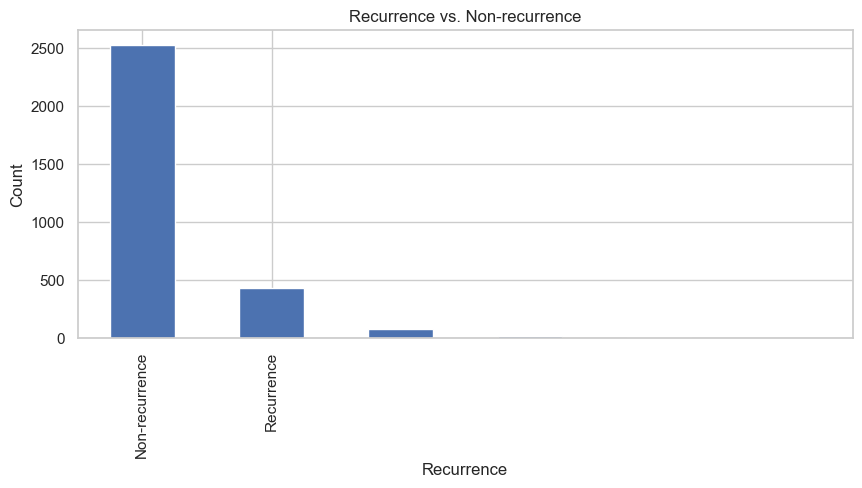

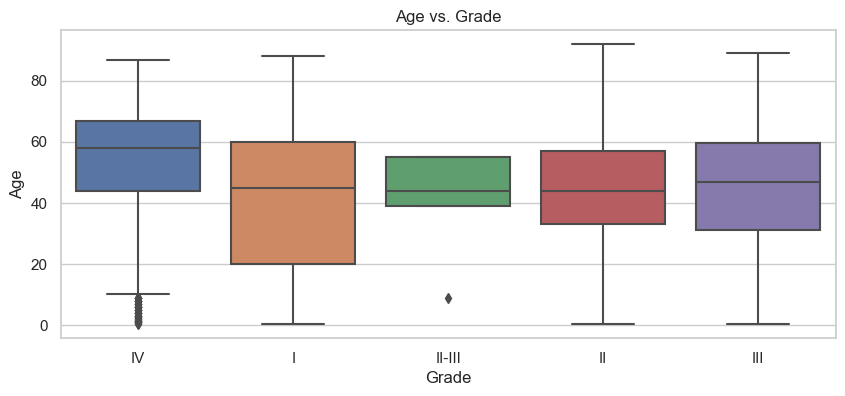

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Read the CSV file
data_file = 'annotation.csv'
df = pd.read_csv(data_file)

# Basic analysis
num_patients = len(df)
num_tumor_types = len(df['diagnosis'].unique())
num_grades = len(df['grade'].dropna().unique())
num_subtypes = len(df['subtype'].dropna().unique())
num_controls = len(df[df['control'] == 1])
num_recurrences = len(df[df['recurrence'] == 1])
age_mean = df['age'].mean()
age_std = df['age'].std()
sex_counts = df['sex'].value_counts()

# Print results
print(f'Number of patients: {num_patients}')
print(f'Number of tumor types: {num_tumor_types}')
print(f'Number of tumor grades: {num_grades}')
print(f'Number of tumor subtypes: {num_subtypes}')
print(f'Number of control samples: {num_controls}')
print(f'Number of recurrences: {num_recurrences}')
print(f'Average age: {age_mean:.2f} (standard deviation: {age_std:.2f})')
print('Sex distribution:')
print(sex_counts)

# Set plotting style
sns.set(style="whitegrid")

# Diagnosis distribution
plt.figure(figsize=(10, 4))
diagnosis_counts = df['diagnosis'].value_counts()
diagnosis_top = diagnosis_counts.head(10)
diagnosis_top.plot(kind='bar')
plt.title('Top 10 Diagnoses')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Grade distribution
plt.figure(figsize=(10, 4))
grade_counts = df['grade'].value_counts()
grade_counts.plot(kind='bar')
plt.title('Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

# Sex distribution
plt.figure(figsize=(10, 4))
sex_counts = df['sex'].value_counts()
sex_counts.plot(kind='bar')
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Age distribution
plt.figure(figsize=(10, 4))
sns.histplot(df['age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Recurrence vs. Non-recurrence
plt.figure(figsize=(10, 4))
recurrence_counts = df['recurrence'].value_counts()
recurrence_counts.plot(kind='bar')
plt.title('Recurrence vs. Non-recurrence')
plt.xlabel('Recurrence')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-recurrence', 'Recurrence'])
plt.show()

# Age vs. Grade boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x='grade', y='age', data=df)
plt.title('Age vs. Grade')
plt.xlabel('Grade')
plt.ylabel('Age')
plt.show()